# Homework 9

November 11, 2020

##### (1) An experiment was carried out examine the effect of the wall color and room size used for a standardized interview and the measured anxiety level of the respondent.  The following results were obtained: 

##### Complete a traditional analysis of variance on these data, complete with descriptives and estimated effect sizes.

##### For this problem, the investigator believes that the cool colors (blue and greens) will reduce anxiety more than warm colors but won't differ from one another, true?  She also believes that anxiety increases with room size.

In [1]:
room = read.csv('data_files//hw9_q1.csv')

In [2]:
head(room)

size,color,anxiety
small,Red,160
small,Red,155
small,Red,182
small,Yellow,134
small,Yellow,139
small,Yellow,144


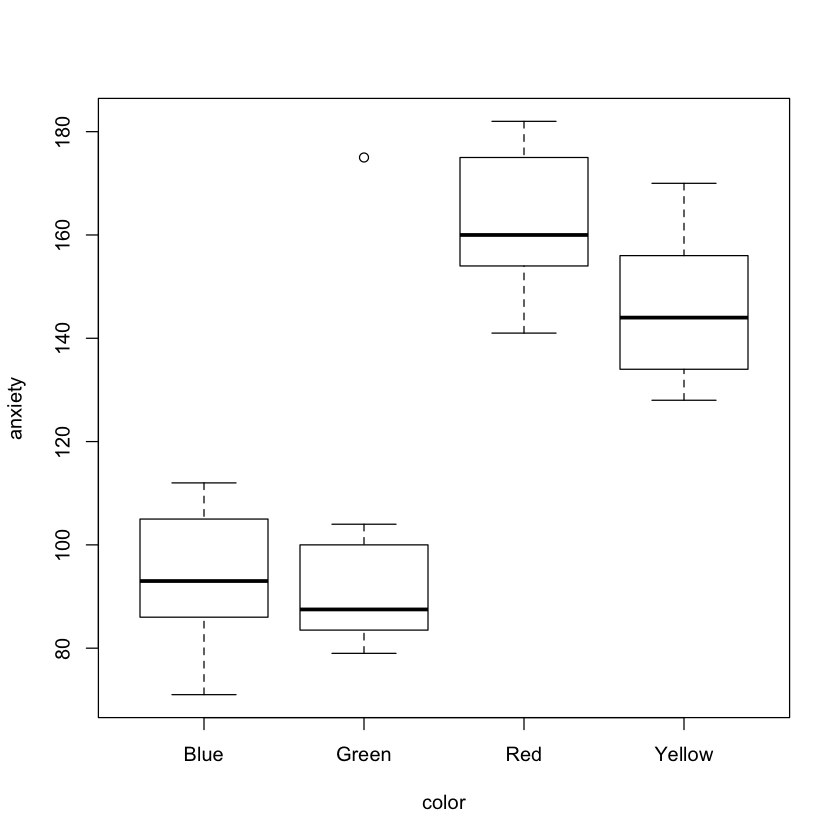

In [3]:
boxplot(anxiety ~ color, data=room)

From the boxplot for color it looks like there is definitely an effect of blue and green vs red and yellow. So I will include this contrast in my analysis.

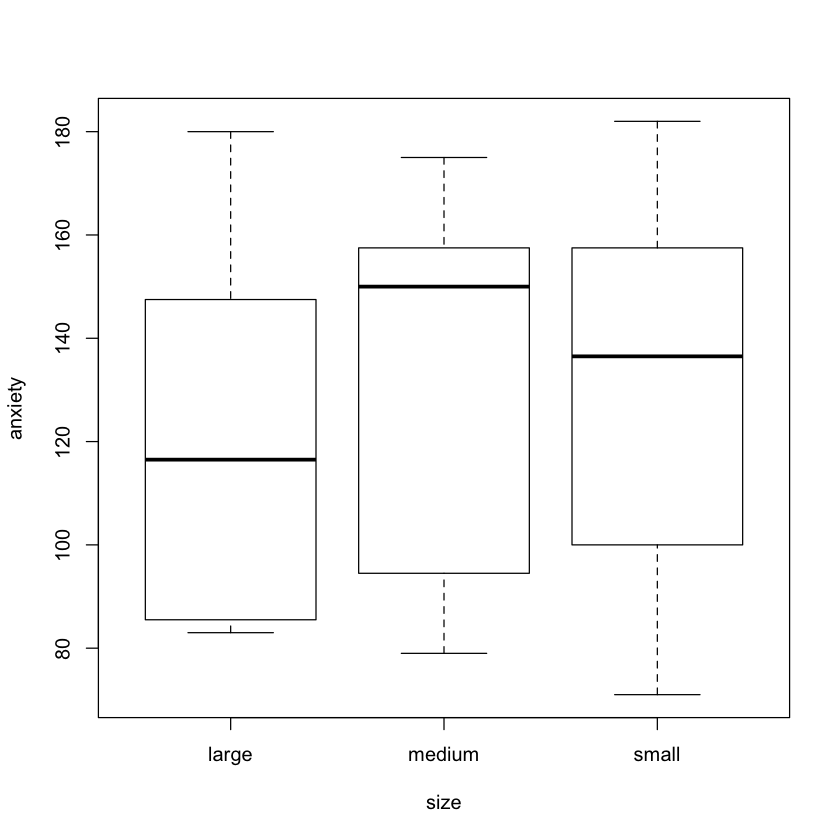

In [4]:
boxplot(anxiety ~ size, data=room)

From the boxplot it looks like there isn't a strong effect of room size, but there may be a slight linear or quadratic effect, which I will check for. It would have been better to have an a priori hypothesis to check for this, but I am not sure the hypothesis.

In [47]:
room$size = as.factor(room$size)
room$color = as.factor(room$color)

# set size contrasts
size_linear = c(-1, 0, 1)
size_quadratic = c(-1, 2, -1)
#check orthogonality
print(sum(size_linear * size_quadratic))

# set color contrasts
GB_v_RY = c(-1, -1, 1, 1)
GB_v_none = c(-1, 1, 0, 0)
RY_v_none = c(0, 0, -1, 1)
#check orthogonality
print(sum(GB_v_RY*GB_v_none*RY_v_none))

#assign contrasts to variables
contrasts(room$size) = cbind(size_linear, size_quadratic)
contrasts(room$color) = cbind(GB_v_RY, GB_v_none, RY_v_none)

[1] 0
[1] 0


In [48]:
# run one way test on size
oneway.test(anxiety ~ size, data=room)


	One-way analysis of means (not assuming equal variances)

data:  anxiety and size
F = 0.26949, num df = 2.000, denom df = 21.217, p-value = 0.7663


In [49]:
# run one way test on color
oneway.test(anxiety ~ color, data=room)


	One-way analysis of means (not assuming equal variances)

data:  anxiety and color
F = 40.454, num df = 3.000, denom df = 16.464, p-value = 8.098e-08


In [50]:
#run anova using both predictor variables
model_aov = aov(anxiety ~ color*size, data = room)
summary(model_aov)

            Df Sum Sq Mean Sq F value   Pr(>F)    
color        3  30445   10148  29.983 4.01e-08 ***
size         2    593     297   0.877    0.430    
color:size   6   3160     527   1.556    0.205    
Residuals   23   7785     338                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [51]:
library(car)
Anova(model_aov, type=3)

,Sum Sq,Df,F value,Pr(>F)
(Intercept),541921.7067,1,1601.1217676,9.056519e-23
color,30974.6255,3,30.5051121,3.428676e-08
size,563.9487,2,0.8331006,4.473980e-01
color:size,3159.7185,6,1.5559117,2.050508e-01
Residuals,7784.6667,23,NA,NA


In [52]:
#total SS
ss = 30974.63 + 563.95 + 3159.72 + 7784.67

color_eta2 = 11881.00 / ss
size_eta2 = 130.67 / ss
int_eta2 = 3159.72 / ss

print(color_eta2)
print(size_eta2)
print(int_eta2)

[1] 0.279665
[1] 0.003075821
[1] 0.07437616


In [53]:
lm_model = lm(anxiety ~ color*size, data = room)
summary(lm_model)


Call:
lm(formula = anxiety ~ color * size, data = room)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.000 -10.000  -1.333   5.000  50.000 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                       125.2222     3.1295  40.014  < 2e-16 ***
colorGB_v_RY                       29.1667     3.1295   9.320 2.84e-09 ***
colorGB_v_none                      1.7222     4.5134   0.382   0.7063    
colorRY_v_none                     -8.5000     4.3363  -1.960   0.0622 .  
sizesize_linear                     4.8333     3.7554   1.287   0.2109    
sizesize_quadratic                  0.2222     2.2567   0.098   0.9224    
colorGB_v_RY:sizesize_linear       -4.1667     3.7554  -1.110   0.2787    
colorGB_v_none:sizesize_linear     11.3333     5.3109   2.134   0.0437 *  
colorRY_v_none:sizesize_linear     -3.0000     5.3109  -0.565   0.5776    
colorGB_v_RY:sizesize_quadratic     2.5000     2.2567   1.108   0.2794    
colorGB_v

From these results it appears that there is a significant main effect of color on anxiety with an eta^2 of 0.28. Size and the interaction of color*size were not significant with small eta^2s of 0.003 and 0.07. Further, using a linear model to look for the effects of contrasts representing the hypotheses that green and blue reduce anxiety compared to red and yellow, I found a significant result with p = 2.84e-09. Further, contrasts checking for differences between green and blue and between red and yellow were not significant, which help to confirm the investigator's hypotheses. However, there was no significant effect of size (linear or quadratic) found, which goes against the investigator's hypothesis.

##### Please analyze these data.  Form and test your own hypotheses.  
##### Description: Experiment comparing penetration of types of arrowheads;  through 3 fabric types and 2 clothing fits.;  Arrowhead Types: 1=Bullet, 2=Judo, 3=Broadhead ;  Clothing Fits: 1=Tight, 2=Loose;  Fabric Types: 1=T-shirt (95% Cotton), 2=Jeans (65% Cttn), 3=Jeans (95% Cttn)

In [55]:
arrow = read.csv('data_files//arrows.csv')
head(arrow)
dim(arrow)

arrowhead,clothFit,clothType,pntrt
1,1,1,17.5
1,1,1,17.6
1,1,1,17.1
1,1,1,17.2
1,2,1,16.7
1,2,1,16.2


[1] 72  4

Hypotheses: (1) Bullets will penetrate further than Judo or Broadhead arrows </br>
(2) There will be no effects of fabric type or clothing fit on penetration

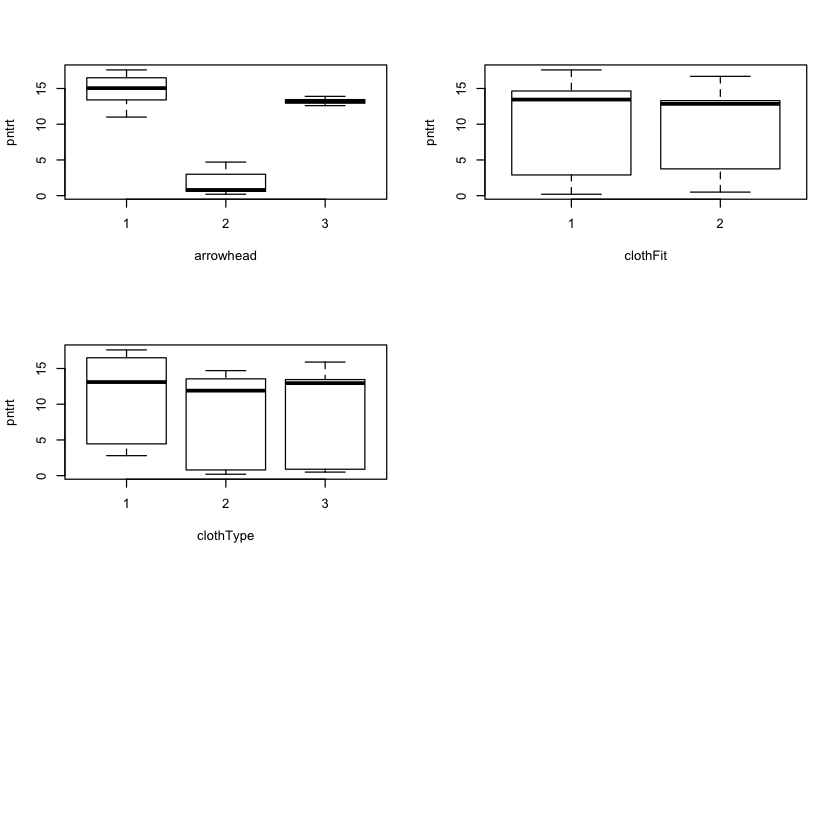

In [61]:
#first plot pntrt by the variables of interest
par(mfrow=c(3,2))
plot(pntrt ~ arrowhead, data=arrow)
plot(pntrt ~ clothFit, data=arrow)
plot(pntrt ~ clothType, data=arrow)

In [57]:
arrow$arrowhead = as.factor(arrow$arrowhead)
arrow$clothFit = as.factor(arrow$clothFit)
arrow$clothType = as.factor(arrow$clothType)

bullet_v_arrow = c(-2, 1, 1)
contrasts(arrow$arrowhead) = cbind(bullet_v_arrow)

In [58]:
#run linear model to test hypothesis 1
bullet_arrow_model = lm(pntrt ~ arrowhead + clothFit + clothType, data=arrow)
summary(bullet_arrow_model)


Call:
lm(formula = pntrt ~ arrowhead + clothFit + clothType, data = arrow)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.4236 -0.6865  0.3507  0.8462  2.0056 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             11.62361    0.26072  44.583  < 2e-16 ***
arrowheadbullet_v_arrow -2.44028    0.09218 -26.474  < 2e-16 ***
arrowhead                8.14351    0.22579  36.067  < 2e-16 ***
clothFit2               -0.73056    0.26072  -2.802  0.00666 ** 
clothType2              -2.35000    0.31931  -7.360 3.70e-10 ***
clothType3              -1.80417    0.31931  -5.650 3.69e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.106 on 66 degrees of freedom
Multiple R-squared:  0.9691,	Adjusted R-squared:  0.9667 
F-statistic: 413.8 on 5 and 66 DF,  p-value: < 2.2e-16


In [66]:
# run anova as well
bullet_arrow_aov = aov(pntrt ~ clothFit*clothType, data= arrow)
Anova(bullet_arrow_aov, type=3)

,Sum Sq,Df,F value,Pr(>F)
(Intercept),1521.000833,1,39.75726022,2.726747e-08
clothFit,0.000000,1,0.00000000,1.000000e+00
clothType,19.967222,2,0.26096043,7.711025e-01
clothFit:clothType,4.895278,2,0.06397854,9.380832e-01
Residuals,2524.974167,66,NA,NA


These results show that my first hypothesis was correct. Bullets penetrate significantly further than arrowheads. This can be seen in hw9_q2.png, but the linear contrast testing this hypothesis is also significant in the linear model. If only running an anova it appears my second hypothesis is true and there is not significant effect of either clothFit or clothType. However, when entered into a linear model that accounts for the effects of arrowheads, it appears that loose fabric and both types of jeans actually have significantly less penetration than do tight fits and t-shirts, with p=0.007, p=3.7e-10, and p=3.69e-07 respectively. 